In [19]:
from sie import *

## Load the data

In [60]:
data=load_data('../examples/data/shoesize.xls')

In [61]:
data.head()

,Index,Gender,Size,Height
0,1,F,5.5,60
1,2,F,6.0,60
2,3,F,7.0,60
3,4,F,8.0,60
4,5,F,8.0,60


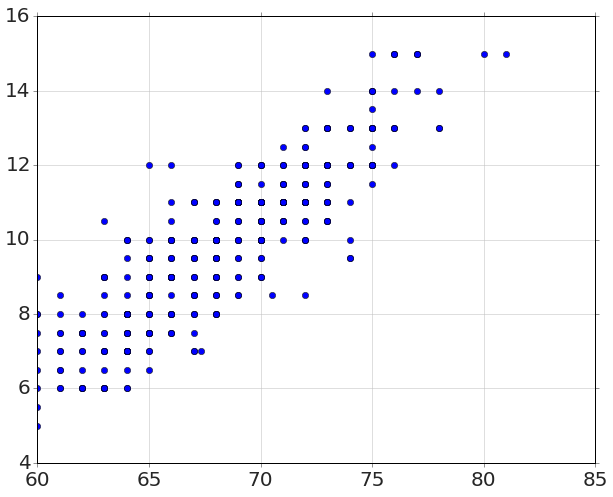

In [62]:
plot(data['Height'],data['Size'],'o')

In [63]:
import random

In [64]:
random.seed(102)
rows = random.sample(data.index, 10)
newdata=data.ix[rows]
data=newdata
data

,Index,Gender,Size,Height
60,61,F,7.0,64
251,252,M,9.0,70
69,70,F,8.0,64
290,291,M,11.0,71
247,248,M,12.0,69
156,157,F,9.5,68
231,232,M,10.0,69
17,18,F,6.5,61
216,217,M,10.0,68
252,253,M,9.0,70


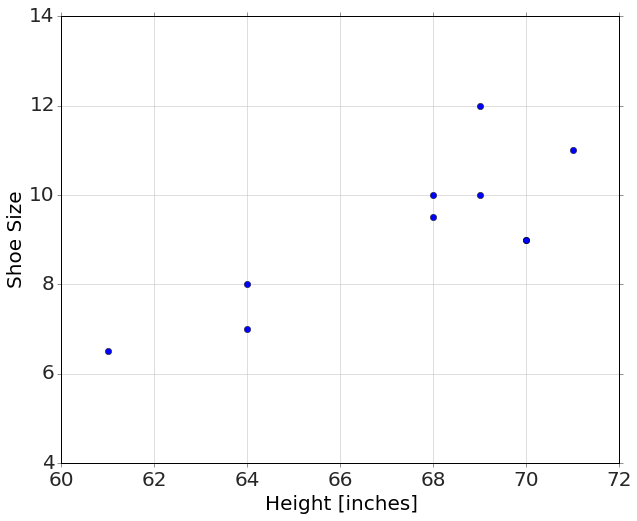

In [65]:
plot(data['Height'],data['Size'],'o')
gca().set_xlim([60,72])
gca().set_ylim([4,14])
xlabel('Height [inches]')
ylabel('Shoe Size')
savefig("../../figs/shoesize_subset.pdf")

In [66]:
for idx in data.index:
    row=data.ix[idx]
    h=row['Height']
    s=row['Size']
    print h,s

64.0 7.0
70.0 9.0
64.0 8.0
71.0 11.0
69.0 12.0
68.0 9.5
69.0 10.0
61.0 6.5
68.0 10.0
70.0 9.0


In [67]:
print r"""
\begin{center}
\begin{tabular}{cc}
Height [inches] & Shoe Size \\ \hline\hline"""
for idx in data.index:
    row=data.ix[idx]
    h=row['Height']
    s=row['Size']
    print r"%.1f & %d\\" % (h,s) 

print r"""
\end{tabular}
\end{center}"""



\begin{center}
\begin{tabular}{cc}
Height [inches] & Shoe Size \\ \hline\hline
64.0 & 7\\
70.0 & 9\\
64.0 & 8\\
71.0 & 11\\
69.0 & 12\\
68.0 & 9\\
69.0 & 10\\
61.0 & 6\\
68.0 & 10\\
70.0 & 9\\

\end{tabular}
\end{center}


## Do the fit

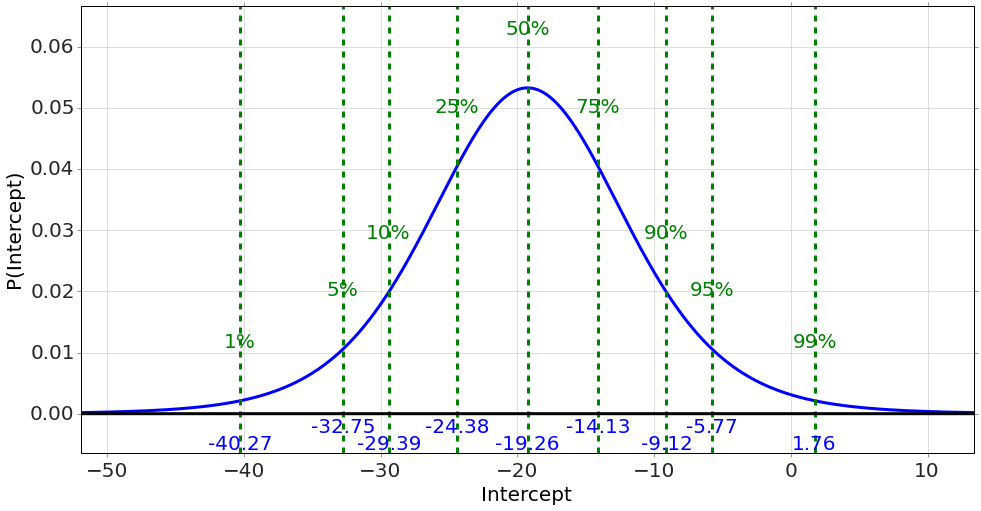

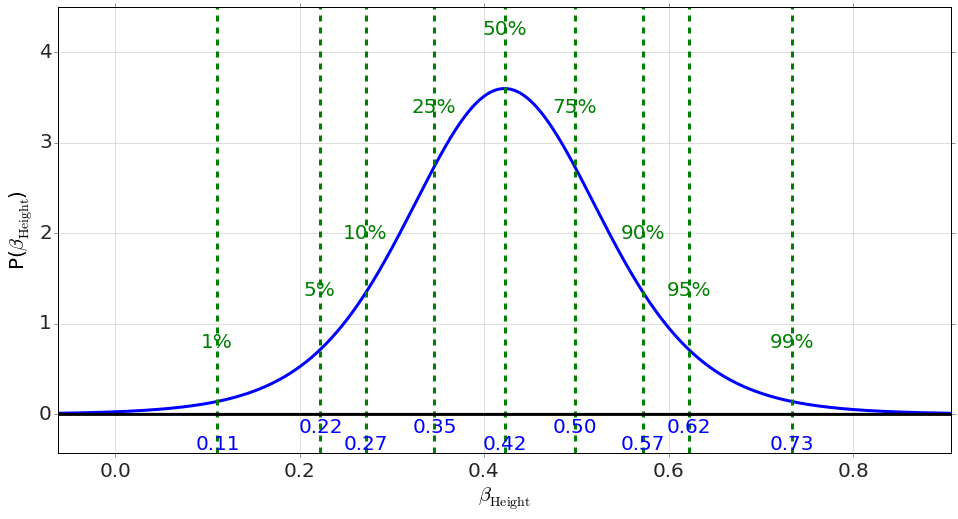

In [68]:
result=regression('Size ~ Height',data)

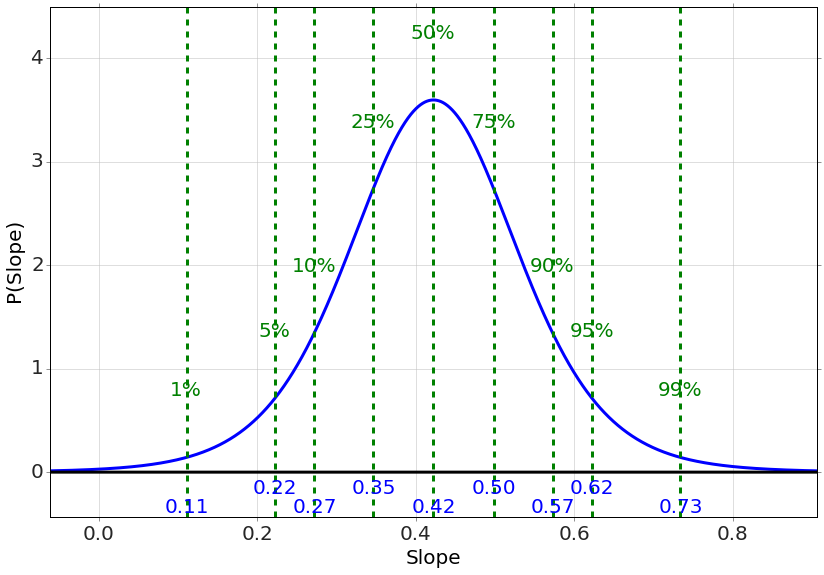

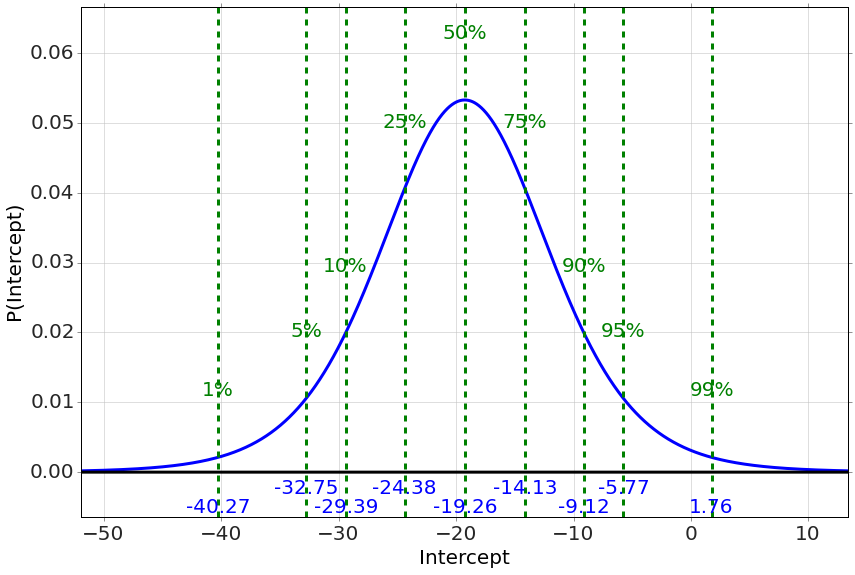

In [69]:
key='Height'
var=result[key]
xmin=var.ppf(0.001)
xmax=var.ppf(0.999)
if key=="Intercept":
    label=key
else:
    label='Slope'

distplot(var,
    xlim=[xmin,xmax],
    label=label,
#    figsize=(16,8),
    )
savefig("../../figs/shoesize_subset_slope.pdf")

key='Intercept'
var=result[key]
xmin=var.ppf(0.001)
xmax=var.ppf(0.999)
if key=="Intercept":
    label=key
else:
    label='Slope'

distplot(var,
    xlim=[xmin,xmax],
    label=label,
#    figsize=(16,8),
    )
savefig("../../figs/shoesize_subset_intercept.pdf")

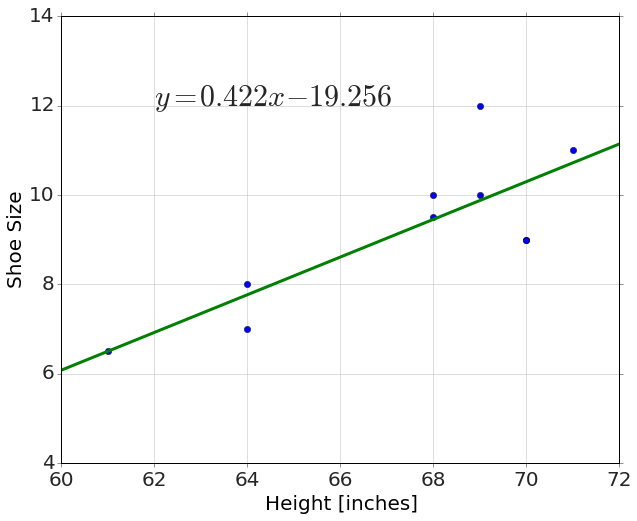

In [33]:
plot(data['Height'],data['Size'],'o')

h=linspace(60,72,10)
plot(h,result['_Predict'](Height=h),'-')

gca().set_xlim([60,72])
gca().set_ylim([4,14])
xlabel('Height [inches]')
ylabel('Shoe Size')

b=result.Intercept.mean()
m=result.Height.mean()

if b>0:
    text(62,12,'$y=%.3f x + %.3f$' % (m,b),fontsize=30)
else:
    text(62,12,'$y=%.3f x %.3f$' % (m,b),fontsize=30)

savefig("../../figs/shoesize_subset_fit.pdf")

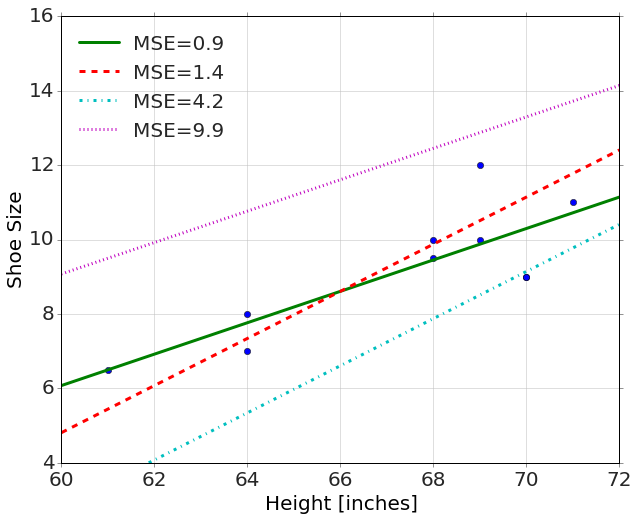

In [36]:
x,y=data['Height'],data['Size']
plot(x,y,'o')


styles=['-','--','-.',':']
colors=['g','r','c','m']

xx=linspace(60,72,10)

b1=result.Intercept.mean()
m1=result.Height.mean()
y66=m1*66+b1

for i in range(4):
    if i==0:
        yy=m1*xx+b
        y1=m1*x+b
    elif i==1:
        m=m1*1.5
        yy=m*xx+b -(m*66+b) + y66
        y1=m*x+b -(m*66+b) + y66
    elif i==2:
        m=m1*1.5
        yy=m*xx+b -(m*66+b) + y66-2
        y1=m*x+b -(m*66+b) + y66-2
    elif i==3:
        m=m1*1
        yy=m*xx+b -(m*66+b) + y66+3        
        y1=m*x+b -(m*66+b) + y66+3        
    else:
        raise ValueError,"blah!"
        
    MSE=mean((y1-y)**2)        
    label='MSE=%.1f' % MSE
    plot(xx,yy,styles[i]+colors[i],label=label)

gca().set_xlim([60,72])
gca().set_ylim([4,16])
xlabel('Height [inches]')
ylabel('Shoe Size')
legend(loc='upper left')

savefig("../../figs/shoesize_subset_regression_mse.pdf")

## Fuel consumption example

From Bowerman page 459

In [37]:
x=array([28,28,32.5,39,45.9,57.8,58.1,62.5])
y=array([12.4,11.7,12.4,10.8,9.4,9.5,8.0,7.5])
N=len(x)

In [38]:
data=pandas.DataFrame({'Fuel_Consumption':y,'Average_Temperature':x})

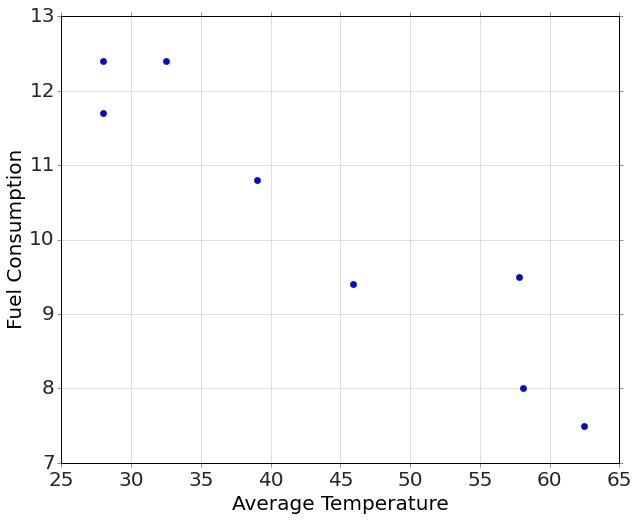

In [39]:
plot(data['Average_Temperature'],data['Fuel_Consumption'],'o')
xlabel('Average Temperature')
ylabel('Fuel Consumption')

In [40]:
data

,Average_Temperature,Fuel_Consumption
0,28.0,12.4
1,28.0,11.7
2,32.5,12.4
3,39.0,10.8
4,45.9,9.4
5,57.8,9.5
6,58.1,8.0
7,62.5,7.5


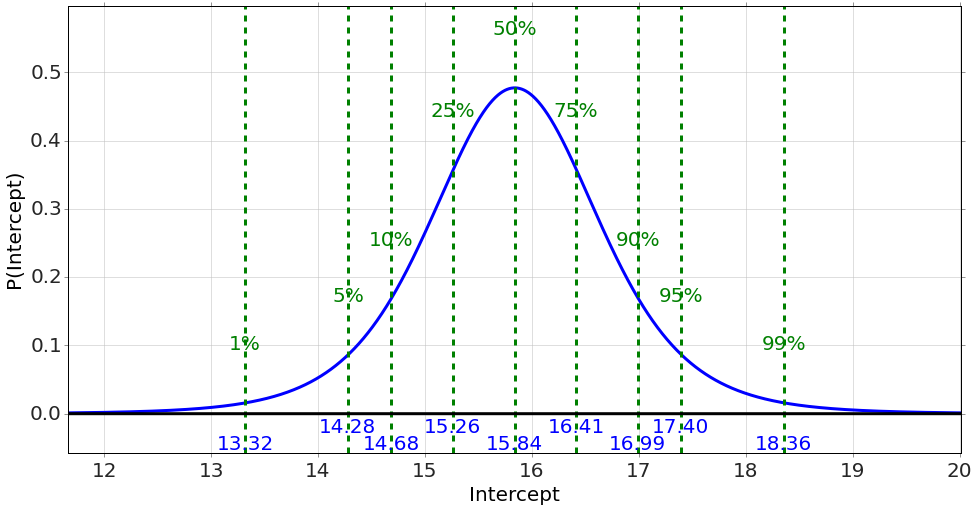

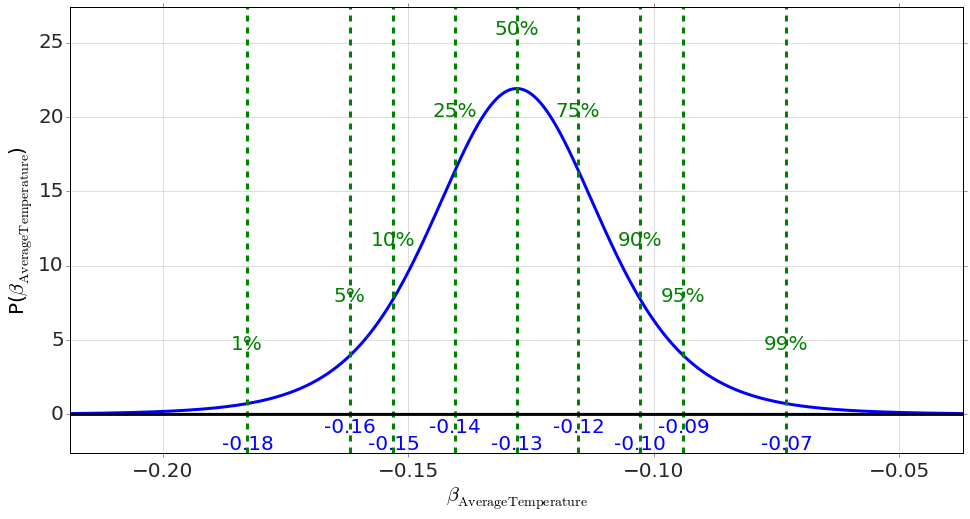

In [42]:
result=regression('Fuel_Consumption ~ Average_Temperature',data)

In [43]:
credible_interval(result['Average_Temperature'])

(-0.17063826310017996, -0.12792171495099175, -0.085205166801803539)

In [44]:
credible_interval(result['Intercept'])

(13.875988618588037, 15.837857414969857, 17.799726211351675)

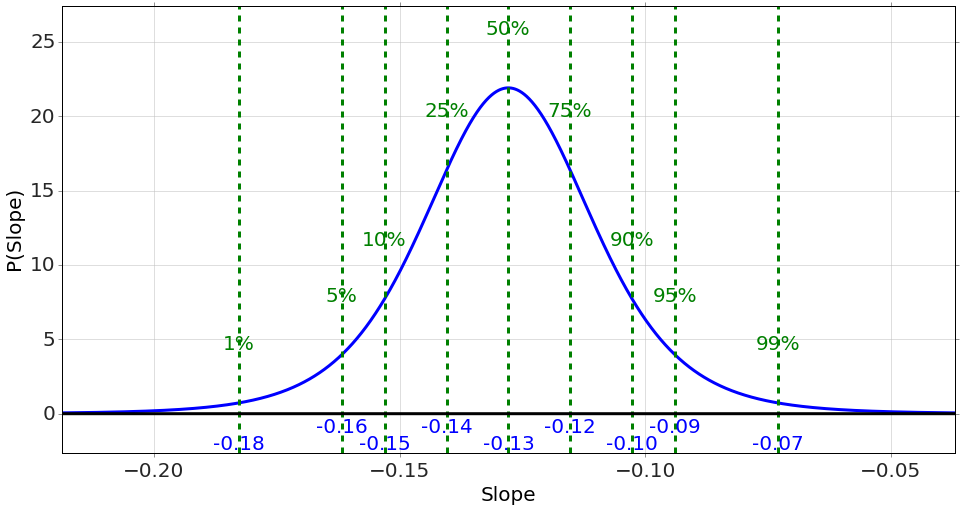

In [46]:
key='Average_Temperature'
var=result[key]
xmin=var.ppf(0.001)
xmax=var.ppf(0.999)
if key=="Intercept":
    label=key
else:
    label='Slope'

distplot(var,
    xlim=[xmin,xmax],
    label=label,
    figsize=(16,8),
    )


## SAT data

In [1]:
from sie import *

In [2]:
data=load_data('../examples/data/sat.csv')

In [3]:
data.head()

,Unnamed: 0,state,expenditure,ratio,salary,percent_taking,verbal,mat,total
0,0,Alabama,4.405,17.2,31.144,8,491,538,1029
1,1,Alaska,8.963,17.6,47.951,47,445,489,934
2,2,Arizona,4.778,19.3,32.175,27,448,496,944
3,3,Arkansas,4.459,17.1,28.934,6,482,523,1005
4,4,California,4.992,24.0,41.078,45,417,485,902


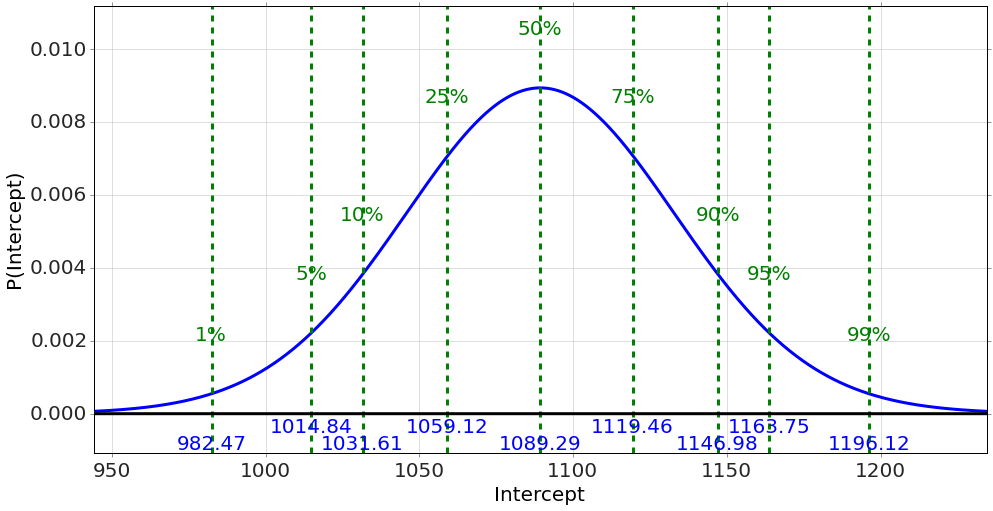

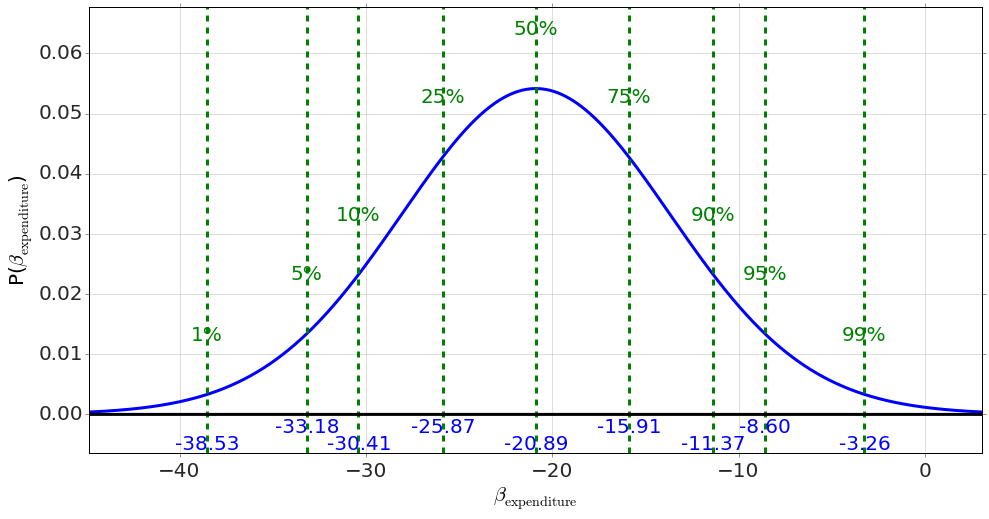

In [4]:
result=regression('total ~ expenditure',data)

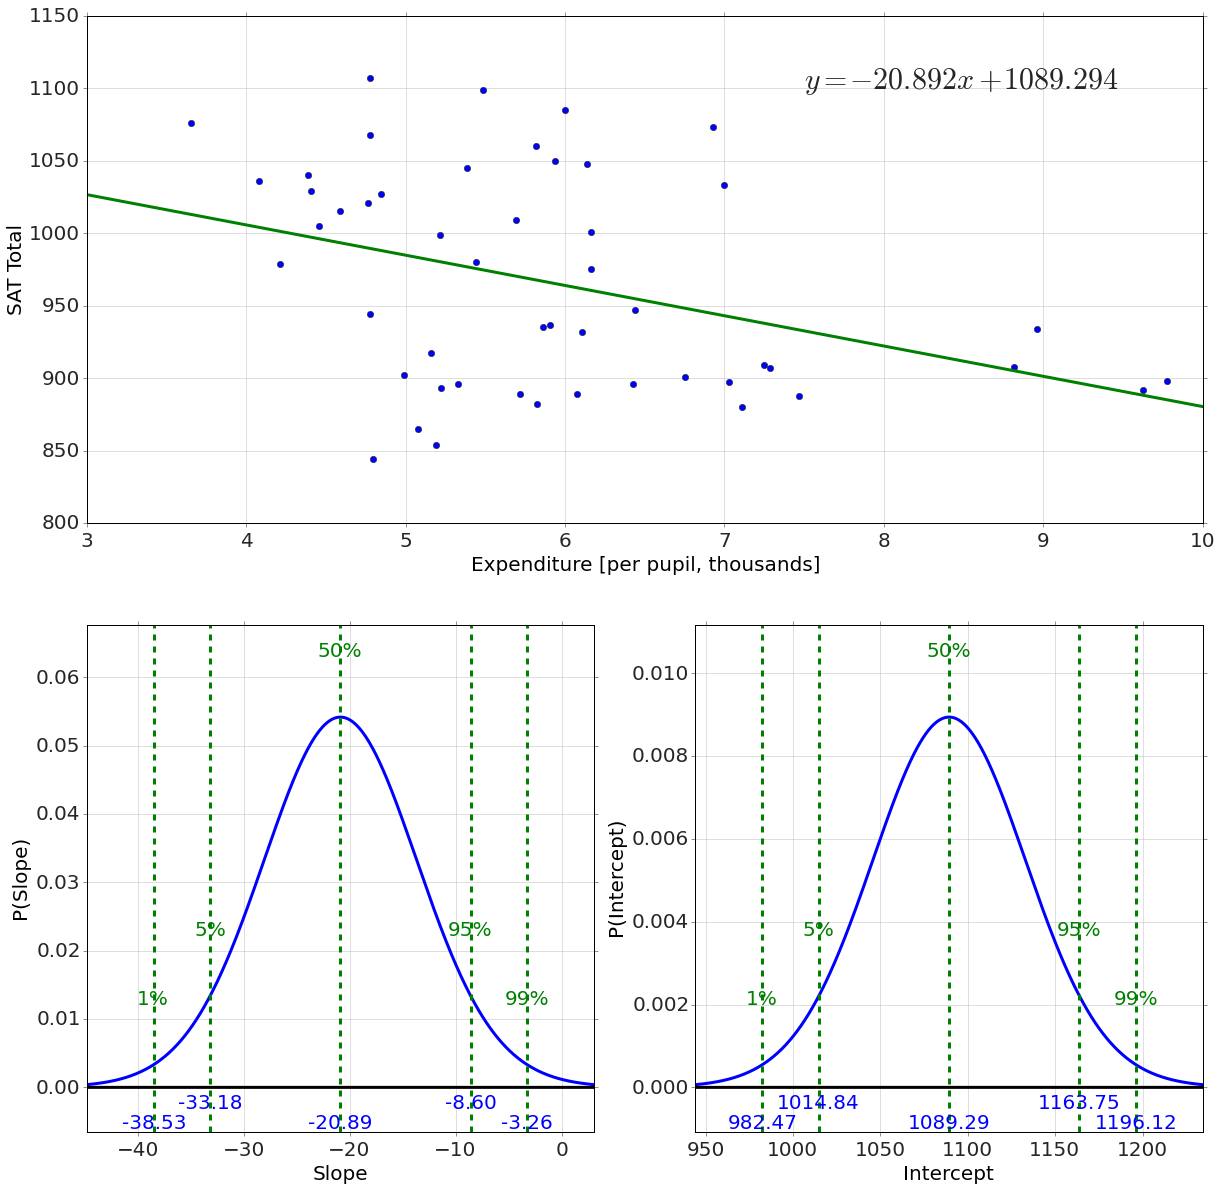

In [7]:
fs=(20,20)
figure(1,figsize=fs)

subplot(2,1,1)

plot(data['expenditure'],data['total'],'o')
xlabel('Expenditure [per pupil, thousands]')
ylabel('SAT Total')
h=linspace(3,10,10)
plot(h,result['_Predict'](expenditure=h),'-')

b=result.Intercept.mean()
m=result.expenditure.mean()

if b>0:
    text(7.5,1100,'$y=%.3f x + %.3f$' % (m,b),fontsize=30)
else:
    text(7.5,1100,'$y=%.3f x %.3f$' % (m,b),fontsize=30)



key='expenditure'
var=result[key]
xmin=var.ppf(0.001)
xmax=var.ppf(0.999)
if key=="Intercept":
    label=key
else:
    label='Slope'
subplot(2,2,3)
distplot(var,
    xlim=[xmin,xmax],
    label=label,
    fignum=1,
         notebook=True,
    figsize=fs,
         quartiles=[.01,0.05,.5,.95,.99],
    )

subplot(2,2,4)
key='Intercept'
var=result[key]
xmin=var.ppf(0.001)
xmax=var.ppf(0.999)
if key=="Intercept":
    label=key
else:
    label='Slope'

distplot(var,
    xlim=[xmin,xmax],
    label=label,
    fignum=1,
         notebook=True,
    figsize=fs,
         quartiles=[.01,0.05,.5,.95,.99],
    )
savefig("../../figs/sat_result.pdf")

### expenditure and percent taking

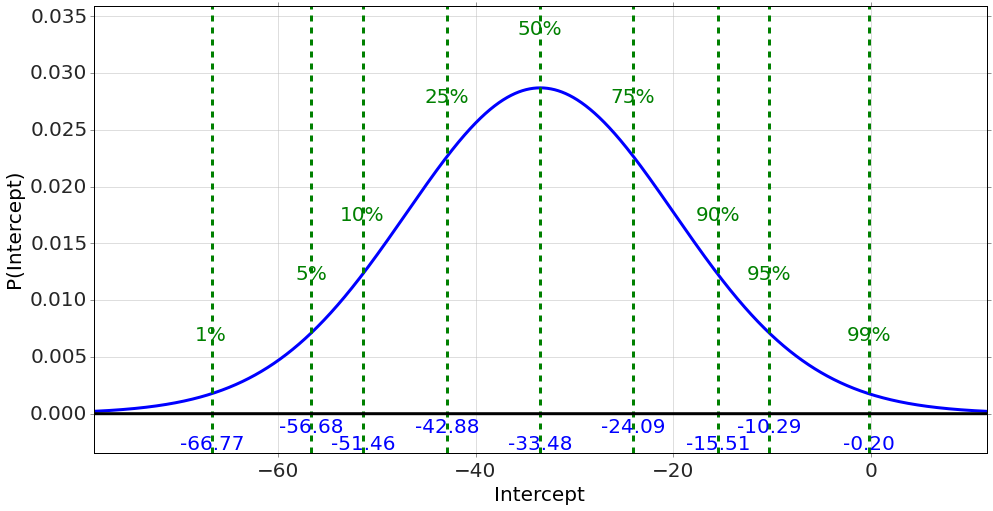

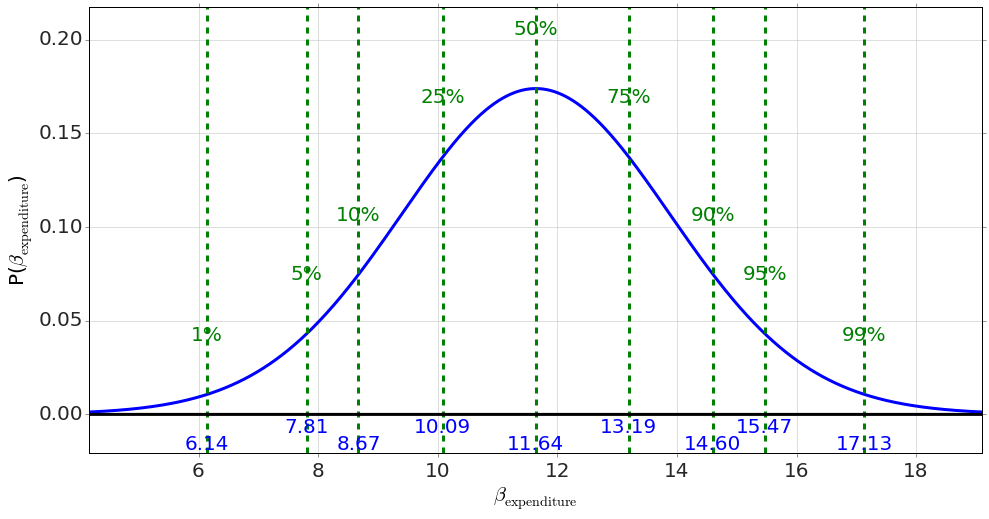

In [13]:
result=regression('percent_taking ~ expenditure',data)

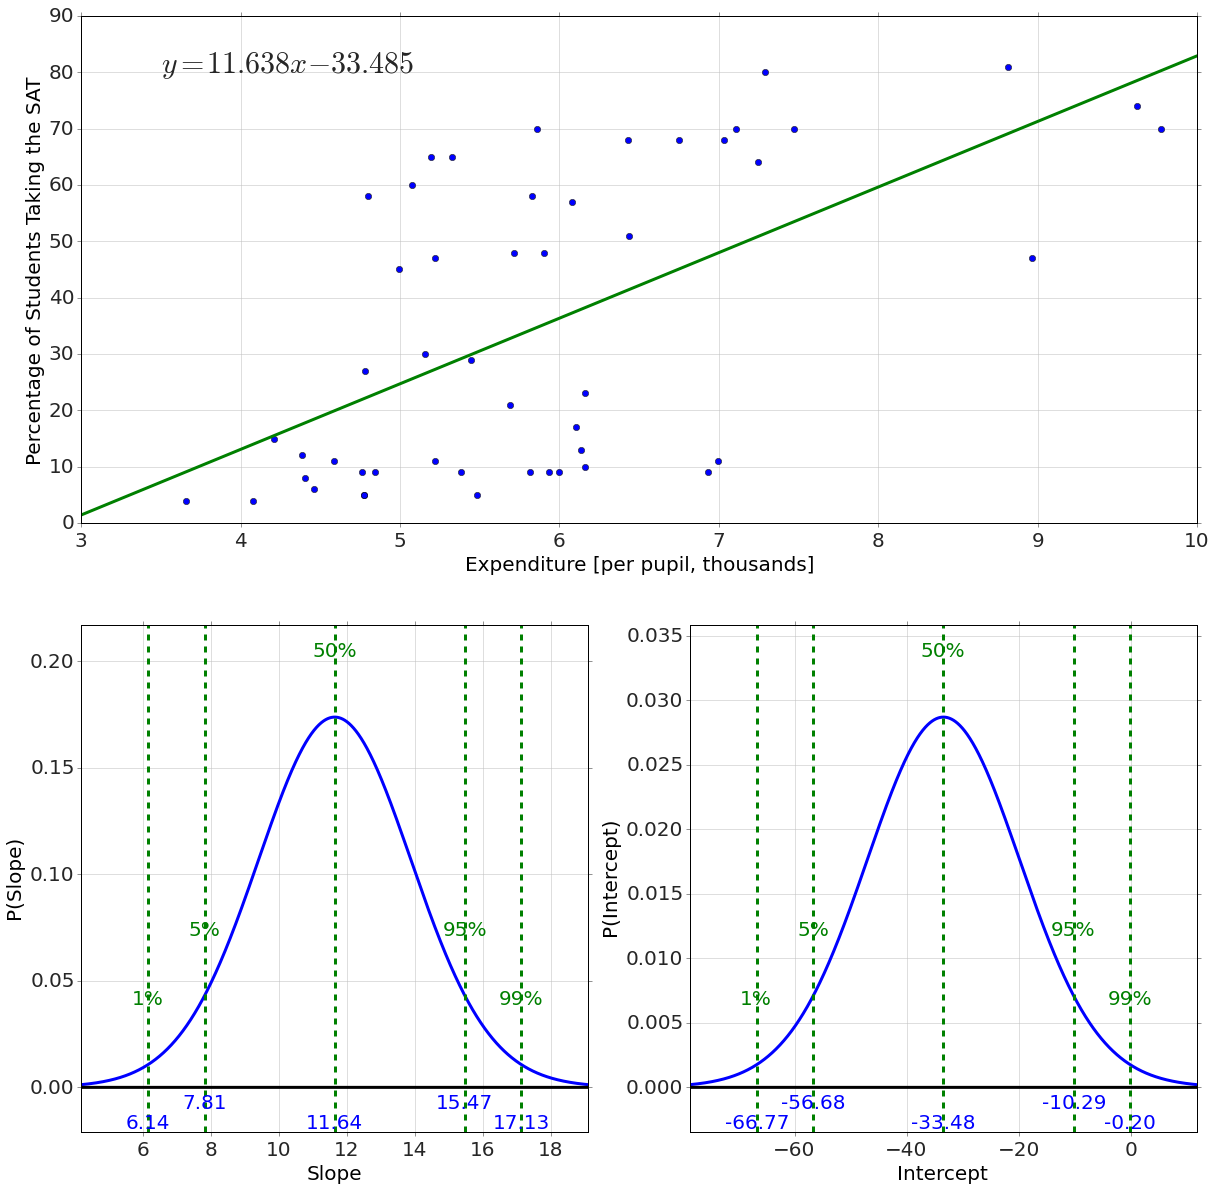

In [18]:
fs=(20,20)
figure(1,figsize=fs)

subplot(2,1,1)

plot(data['expenditure'],data['percent_taking'],'o')
xlabel('Expenditure [per pupil, thousands]')
ylabel('Percentage of Students Taking the SAT')
h=linspace(3,10,10)
plot(h,result['_Predict'](expenditure=h),'-')

b=result.Intercept.mean()
m=result.expenditure.mean()

if b>0:
    text(3.5,80,'$y=%.3f x + %.3f$' % (m,b),fontsize=30)
else:
    text(3.5,80,'$y=%.3f x %.3f$' % (m,b),fontsize=30)



key='expenditure'
var=result[key]
xmin=var.ppf(0.001)
xmax=var.ppf(0.999)
if key=="Intercept":
    label=key
else:
    label='Slope'
subplot(2,2,3)
distplot(var,
    xlim=[xmin,xmax],
    label=label,
    fignum=1,
         notebook=True,
    figsize=fs,
         quartiles=[.01,0.05,.5,.95,.99],
    )

subplot(2,2,4)
key='Intercept'
var=result[key]
xmin=var.ppf(0.001)
xmax=var.ppf(0.999)
if key=="Intercept":
    label=key
else:
    label='Slope'

distplot(var,
    xlim=[xmin,xmax],
    label=label,
    fignum=1,
         notebook=True,
    figsize=fs,
         quartiles=[.01,0.05,.5,.95,.99],
    )
savefig("../../figs/sat_result_percent_taking.pdf")

### Multiple regression

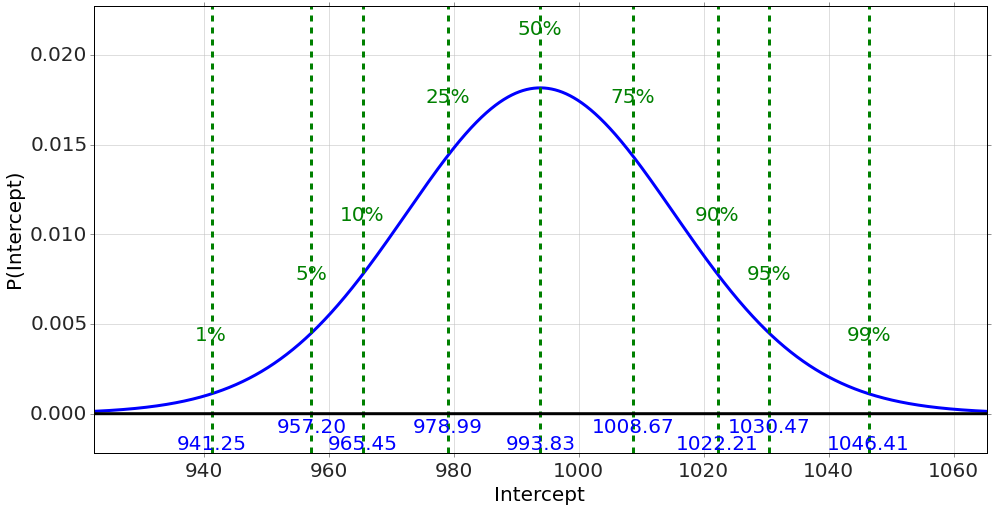

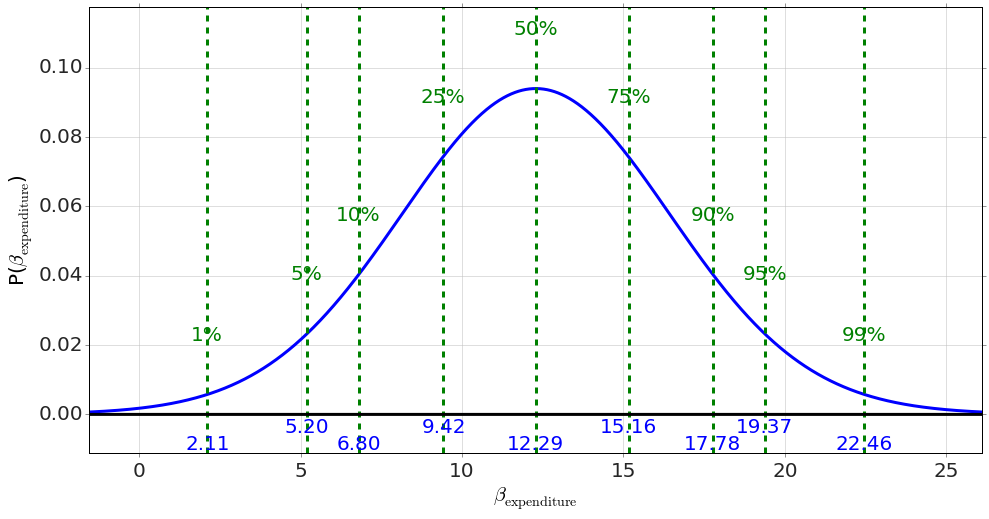

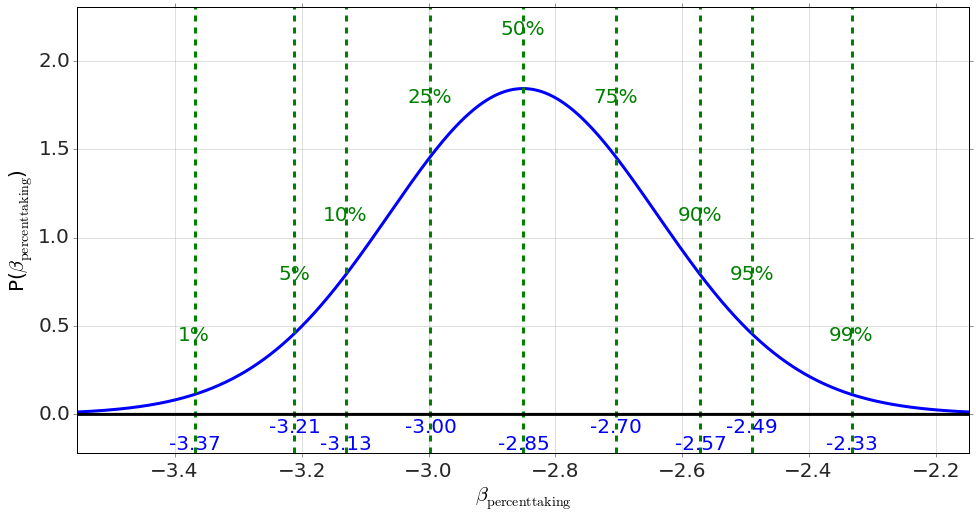

In [8]:
result=regression('total ~ expenditure + percent_taking',data)

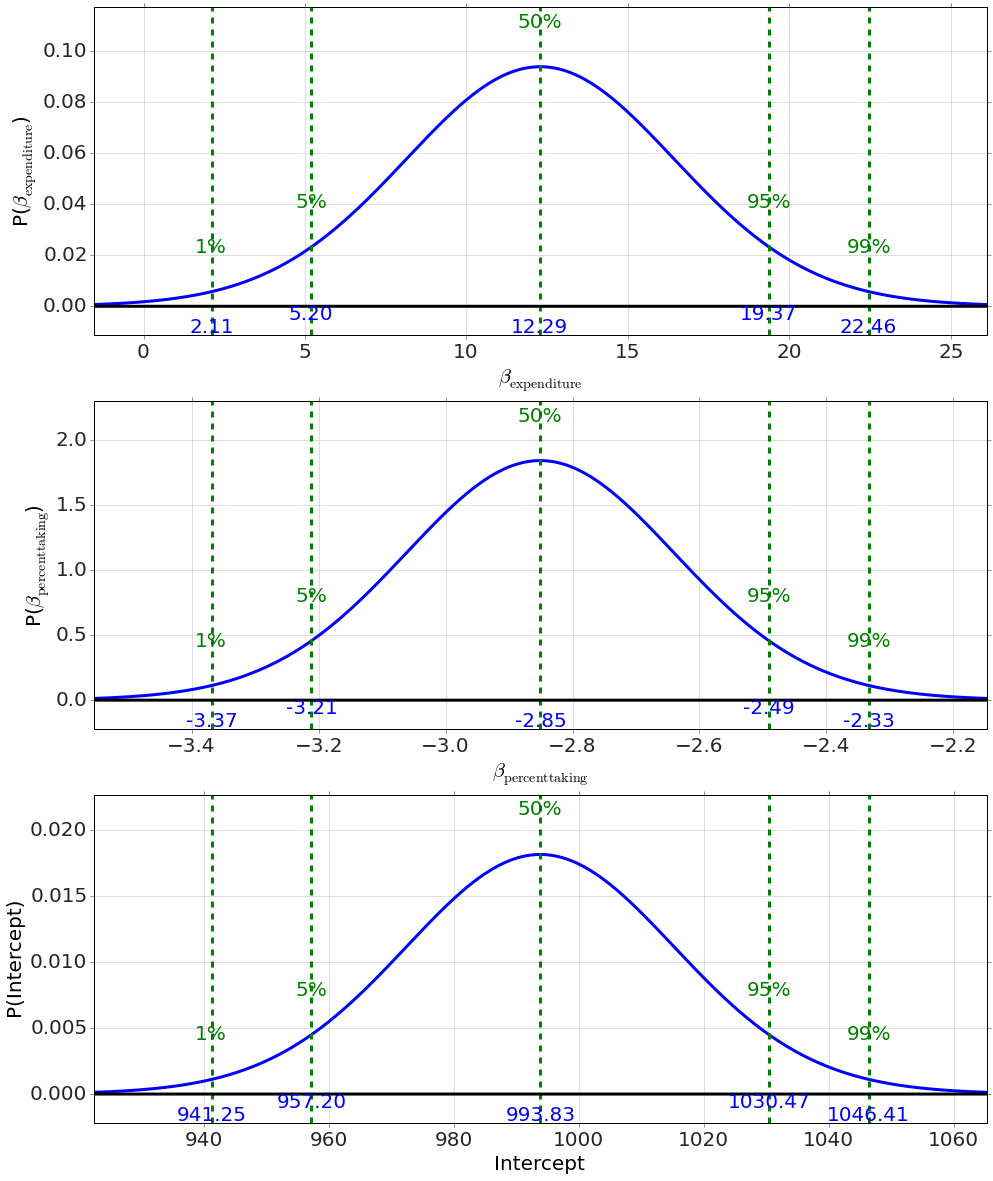

In [12]:
fs=(16,20)
figure(1,figsize=fs)

subplot(3,1,1)


key='expenditure'
var=result[key]
xmin=var.ppf(0.001)
xmax=var.ppf(0.999)
if key=="Intercept":
    label=key
else:
    key=key.replace("_",' ')
    label=r'$\beta_{\rm %s}$' % key

                
distplot(var,
    xlim=[xmin,xmax],
    label=label,
    fignum=1,
         notebook=True,
    figsize=fs,
         quartiles=[.01,0.05,.5,.95,.99],
    )

subplot(3,1,2)

key='percent_taking'
var=result[key]
xmin=var.ppf(0.001)
xmax=var.ppf(0.999)
if key=="Intercept":
    label=key
else:
    key=key.replace("_",' ')
    label=r'$\beta_{\rm %s}$' % key

distplot(var,
    xlim=[xmin,xmax],
    label=label,
    fignum=1,
         notebook=True,
    figsize=fs,
         quartiles=[.01,0.05,.5,.95,.99],
    )


subplot(3,1,3)
key='Intercept'
var=result[key]
xmin=var.ppf(0.001)
xmax=var.ppf(0.999)
if key=="Intercept":
    label=key
else:
    key=key.replace("_",' ')
    label=r'$\beta_{\rm %s}$' % key
distplot(var,
    xlim=[xmin,xmax],
    label=label,
    fignum=1,
         notebook=True,
    figsize=fs,
         quartiles=[.01,0.05,.5,.95,.99],
    )
savefig("../../figs/sat_multiple.pdf")